<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>Bài tập 5: PCA và Logistic Regression </b></h1>

**Sinh viên thực hiện:**
- Thái Trần Khánh Nguyên - 19520188

# Prepare:

In [1]:
#@title Download dữ liệu từ googledrive
!gdown --id 1lMOeZdHW9SzUapAPZvf52jEWt4ZEJOKr

Downloading...
From: https://drive.google.com/uc?id=1lMOeZdHW9SzUapAPZvf52jEWt4ZEJOKr
To: /content/Wine.csv
100% 11.5k/11.5k [00:00<00:00, 23.4MB/s]


In [2]:
#@title Import thư viện
import pandas as pd
import numpy as np
from numpy.linalg import eig

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
#@title Đọc dữ liệu Wine.csv
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
X, y = data.iloc[:,:-1], data['Customer_Segment']

In [5]:
  scaler = StandardScaler()
  scaler.fit(X)
  X = scaler.transform(X)
  X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Logistic Regression

In [6]:
#@title PCA: Giảm chiều dữ liệu từ 13 features thành 2
pca_x = PCA(n_components=2)
new_x = pca_x.fit_transform(X)

In [7]:
#@title Phân chia dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(
    new_x, y, test_size=0.2, random_state=19520188)

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
score = lr.score(X_test, y_test)
predictions = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)

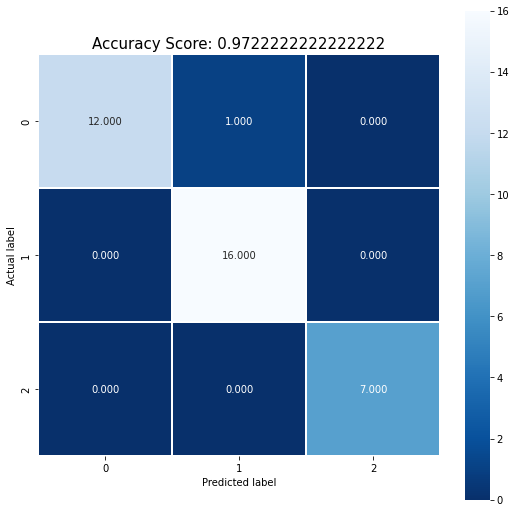

In [10]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#K-Fold cross validation

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits= 5)
acc_list, models, fold_idx = [], [], 1

for train_index, test_index in kf.split(new_x):
  print("TRAINING FOLD:", fold_idx)

  lr = LogisticRegression()
  lr.fit(new_x[train_index], y[train_index])
  score = lr.score(new_x[test_index], y[test_index])

  acc_list.append(score)
  models.append(lr)

  print("Accuracy:", score)
  fold_idx += 1

print('\n* Đánh giá tổng thể các folds:')
print(f'> Accuracy: {np.mean(acc_list)} (Độ lệch +- {np.std(acc_list)})')

TRAINING FOLD: 1
Accuracy: 0.8888888888888888
TRAINING FOLD: 2
Accuracy: 0.9722222222222222
TRAINING FOLD: 3
Accuracy: 0.9166666666666666
TRAINING FOLD: 4
Accuracy: 0.9142857142857143
TRAINING FOLD: 5
Accuracy: 1.0

* Đánh giá tổng thể các folds:
> Accuracy: 0.9384126984126983 (Độ lệch +- 0.04109425406682968)


In [14]:
#@title Sử dụng cross_validation
from sklearn.model_selection import cross_val_score

lr2 = LogisticRegression()
scores = cross_val_score(lr2, new_x, y, cv=5)

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

* Đánh giá tổng thể các folds:
> Accuracy: 0.9552380952380952 (Độ lệch +- 0.02198627575310471)
